## 3-Way ANOVA

The three-way ANOVA is an extension of the two-way ANOVA for assessing whether there is an interaction effect between three independent categorical variables on a continuous outcome variable.

We’ll use the **headache dataset**, which contains the measures of migraine headache episode pain score in 72 participants treated with three different treatments. The participants include 36 males and 36 females. Males and females were further subdivided into whether they were at low or high risk of migraine.

We want to understand how each independent variable (type of treatments, risk of migraine and gender) interact to predict the pain score.

In [1]:
import pandas as pd

# URL to the CSV file
url = "https://github.com/kflisikowski/ds/raw/master/headache.csv"

# Load the data into a DataFrame
headache = pd.read_csv(url)

# Display the first few rows of the data
print(headache.head())

   id gender risk treatment  pain_score
0   1   male  low         X   79.311695
1   2   male  low         X   76.843399
2   3   male  low         X   70.832421
3   4   male  low         X   81.163944
4   5   male  low         X   75.052213



### Descriptive statistics





### Assumptions


#### Outliers




#### Normality




#### Homogeneity of variance




### Anova





### Post-hoc tests

If there is a significant 3-way interaction effect, you can decompose it into:

-    Simple two-way interaction: run two-way interaction at each level of third variable,
-    Simple simple main effect: run one-way model at each level of second variable,
-    Simple simple pairwise comparisons: run pairwise or other post-hoc comparisons if necessary.

If you do not have a statistically significant three-way interaction, you need to determine whether you have any statistically significant two-way interaction from the ANOVA output. You can follow up a significant two-way interaction by simple main effects analyses and pairwise comparisons between groups if necessary.

#### Two-way interactions




#### Main effects



#### Pairwise comparisons

In [2]:
print(headache['gender'].unique())
print(headache['risk'].unique())
print(headache['treatment'].unique())


['male' 'female']
['low' 'high']
['X' 'Y' 'Z']


In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# general mean, std, min, max
mean = np.mean(headache['pain_score'])
std = np.std(headache['pain_score'])
min_value = np.min(headache['pain_score'])
max_value = np.max(headache['pain_score'])
print("Mean: ", mean)
print("Standard deviation: ", std)
print("Minimum value: ", min_value)
print("Maximum value: ", max_value)

Mean:  77.64839649580502
Standard deviation:  7.450837928890523
Minimum value:  63.7326172260786
Maximum value:  100.0


mean_x =  80.45297974628102 std_x =  8.390197463849095
mean_y =  76.25438576739108 std_y =  7.153600697147225
mean_z =  76.23782397374295 std_z =  5.759936905157523


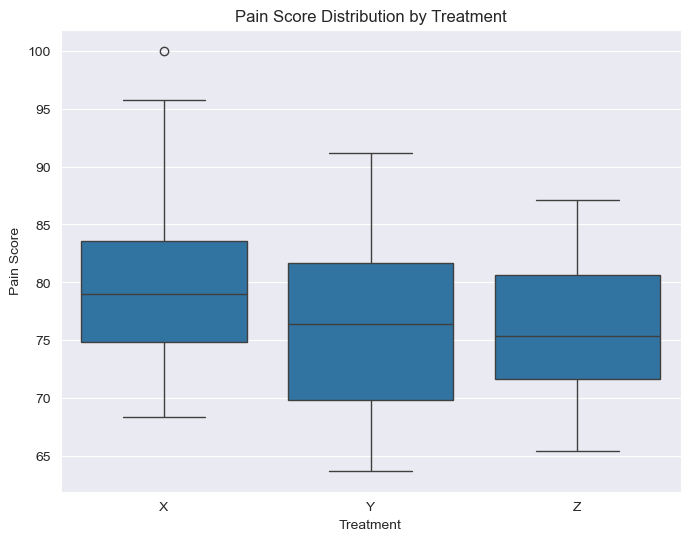

In [4]:
# mean, std for Treatment
mean_treatment_X = np.mean(headache[headache['treatment'] == 'X']['pain_score'])
std_treatment_X = np.std(headache[headache['treatment'] == 'X']['pain_score'])
mean_treatment_Y = np.mean(headache[headache['treatment'] == 'Y']['pain_score'])
std_treatment_Y = np.std(headache[headache['treatment'] == 'Y']['pain_score'])
mean_treatment_Z = np.mean(headache[headache['treatment'] == 'Z']['pain_score'])
std_treatment_Z = np.std(headache[headache['treatment'] == 'Z']['pain_score'])
print("mean_x = ", mean_treatment_X, "std_x = ", std_treatment_X)
print("mean_y = ", mean_treatment_Y, "std_y = ", std_treatment_Y)
print("mean_z = ", mean_treatment_Z, "std_z = ", std_treatment_Z)
plt.figure(figsize=(8, 6))
sns.boxplot(data=headache, x='treatment', y='pain_score')
plt.title('Pain Score Distribution by Treatment')
plt.xlabel('Treatment')
plt.ylabel('Pain Score')
plt.show()

mean_risk_low =  72.65735485889876 std_risk_low =  4.593231921227546
mean_risk_high =  82.63943813271128 std_risk_high =  6.33334026879495


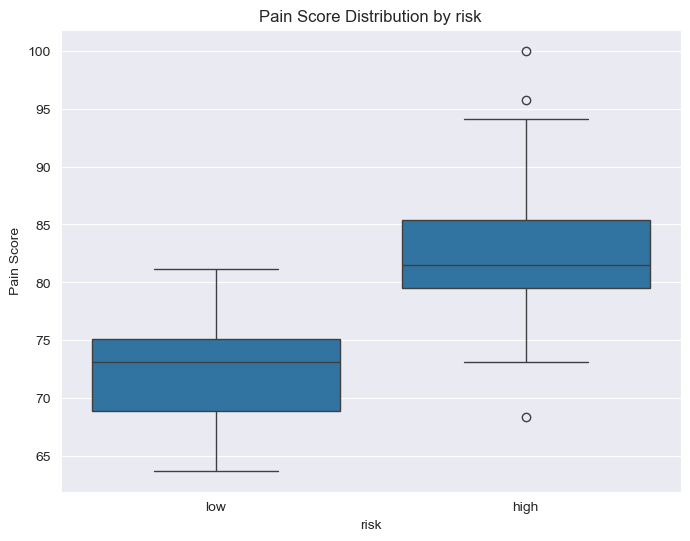

In [5]:
# mean, std for Risk
mean_risk_low = np.mean(headache[headache['risk'] == 'low']['pain_score'])
std_risk_low = np.std(headache[headache['risk'] == 'low']['pain_score'])
mean_risk_high = np.mean(headache[headache['risk'] == 'high']['pain_score'])
std_risk_high = np.std(headache[headache['risk'] == 'high']['pain_score'])
print("mean_risk_low = ", mean_risk_low, "std_risk_low = ", std_risk_low)
print("mean_risk_high = ", mean_risk_high, "std_risk_high = ", std_risk_high)
plt.figure(figsize=(8, 6))
sns.boxplot(data=headache, x='risk', y='pain_score')
plt.title('Pain Score Distribution by risk')
plt.xlabel('risk')
plt.ylabel('Pain Score')
plt.show()

male_mean =  79.7345904407537  std_male =  7.450837928890523
female_mean =  75.56220255085633  std_male =  7.450837928890523


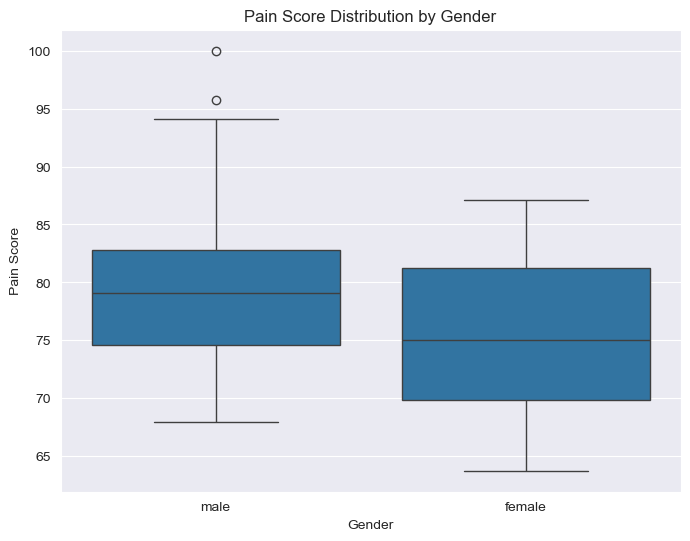

In [6]:
# mean, std for Gender
mean_female = np.mean(headache[headache['gender']=='female']['pain_score'])
std_female = np.std(headache[headache['gender']=='female']['pain_score'])
mean_male = np.mean(headache[headache['gender']=='male']['pain_score'])
std_male = np.std(headache[headache['gender']=='male']['pain_score'])
print("male_mean = ",mean_male, " std_male = ", std)
print("female_mean = ",mean_female, " std_male = ", std)
plt.figure(figsize=(8, 6))
sns.boxplot(data=headache, x='gender', y='pain_score')
plt.title('Pain Score Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Pain Score')
plt.show()


                       mean       std
treatment gender                     
X         female  76.510645  5.008492
          male    84.395315  9.726005
Y         female  74.768614  7.877176
          male    77.740157  6.692240
Z         female  75.407349  6.717979
          male    77.068299  5.074435


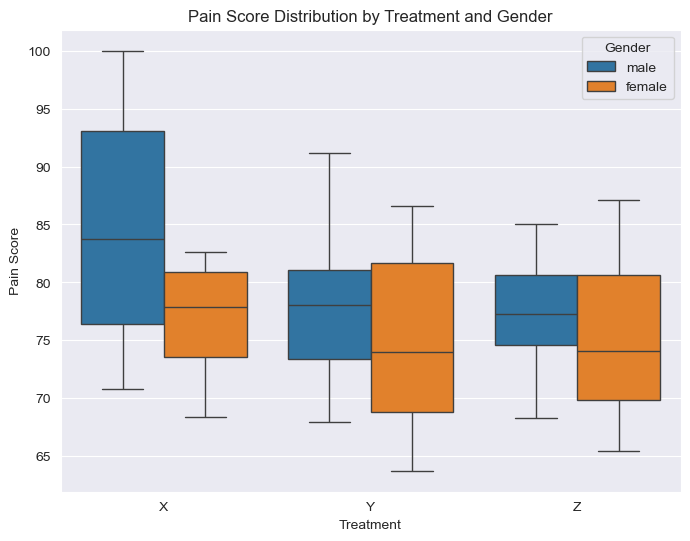

In [7]:
#statistics for combinations:
# Treatment x Gender:
grouped_treat_gender = headache.groupby(['treatment', 'gender'])
stats_treat_gender = grouped_treat_gender['pain_score'].agg(['mean', 'std'])
print(stats_treat_gender)
plt.figure(figsize=(8, 6))
sns.boxplot(data=headache, x='treatment', y='pain_score', hue='gender')
plt.title('Pain Score Distribution by Treatment and Gender')
plt.xlabel('Treatment')
plt.ylabel('Pain Score')
plt.legend(title='Gender')
plt.show()

                     mean       std
treatment risk                     
X         high  85.801953  8.788647
          low   75.104007  3.731564
Y         high  81.758423  4.630128
          low   70.750349  4.910943
Z         high  80.357939  3.893418
          low   72.117709  4.493337


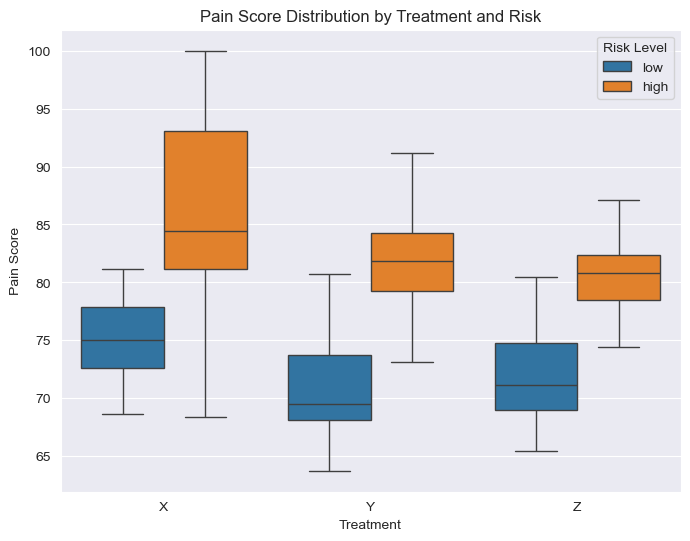

In [8]:
# Treatment x Risk: 
grouped_treat_risk = headache.groupby(['treatment', 'risk'])
stats_treat_risk = grouped_treat_risk['pain_score'].agg(['mean', 'std'])
print(stats_treat_risk)
plt.figure(figsize=(8, 6))
sns.boxplot(data=headache, x='treatment', y='pain_score', hue='risk')
plt.title('Pain Score Distribution by Treatment and Risk')
plt.xlabel('Treatment')
plt.ylabel('Pain Score')
plt.legend(title='Risk Level')
plt.show()

                  mean       std
gender risk                     
female high  80.358501  4.521503
       low   70.765904  4.185816
male   high  84.920375  7.312999
       low   74.548806  4.424989


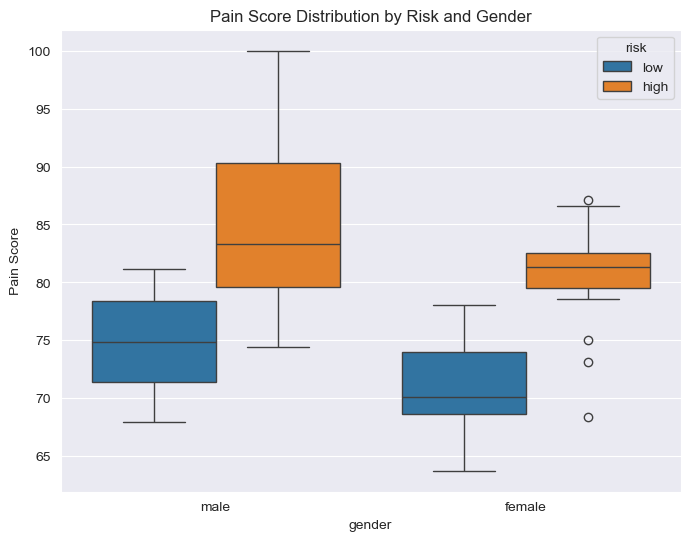

In [9]:
#gender x risk
grouped_gender_risk = headache.groupby(['gender', 'risk'])
stats_gender_risk = grouped_gender_risk['pain_score'].agg(['mean', 'std'])
print(stats_gender_risk)
plt.figure(figsize=(8, 6))
sns.boxplot(data=headache, x='gender', y='pain_score', hue='risk')
plt.title('Pain Score Distribution by Risk and Gender')
plt.xlabel('gender')
plt.ylabel('Pain Score')
plt.legend(title='risk')
plt.show()

                            mean       std
treatment gender risk                     
X         female high  78.865059  5.316489
                 low   74.156231  3.690272
          male   high  92.738847  5.116095
                 low   76.051783  3.854876
Y         female high  81.175304  4.619387
                 low   68.361925  4.081842
          male   high  82.341542  5.000898
                 low   73.138772  4.765061
Z         female high  81.035142  3.984886
                 low   69.779555  2.719645
          male   high  79.680736  4.045885
                 low   74.455863  4.888865


<Figure size 1200x800 with 0 Axes>

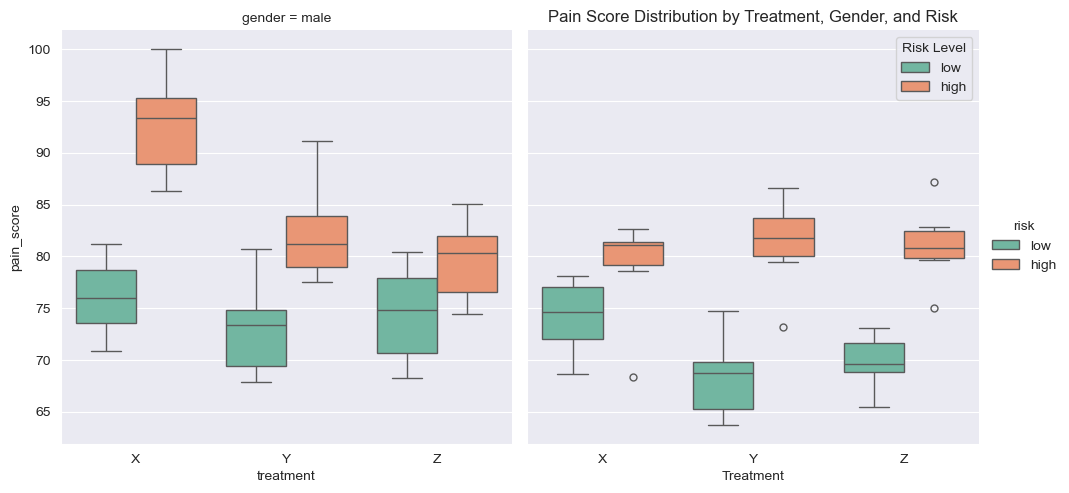

In [10]:
#treatment x Gender x Risk
grouped = headache.groupby(['treatment','gender', 'risk'])
stats = grouped['pain_score'].agg(['mean', 'std'])
print(stats)
plt.figure(figsize=(12, 8))
sns.catplot(data=headache, x='treatment', y='pain_score', hue='risk', col='gender', kind='box', palette="Set2")
plt.title('Pain Score Distribution by Treatment, Gender, and Risk')
plt.xlabel('Treatment')
plt.ylabel('Pain Score')
plt.legend(title='Risk Level')
plt.show()

In [11]:
# it seems that that outliers are present in the data but doesn't affect means and stds significantly
#test for normality uing shapiro-wilk test
from scipy.stats import shapiro

for name, group in grouped:
    stat, p = shapiro(group['pain_score'])
    print(name, ': Statistics = %.3f, p = %.3f' % (stat, p))
    
    

('X', 'female', 'high') : Statistics = 0.714, p = 0.009
('X', 'female', 'low') : Statistics = 0.933, p = 0.600
('X', 'male', 'high') : Statistics = 0.958, p = 0.808
('X', 'male', 'low') : Statistics = 0.982, p = 0.962
('Y', 'female', 'high') : Statistics = 0.939, p = 0.654
('Y', 'female', 'low') : Statistics = 0.927, p = 0.555
('Y', 'male', 'high') : Statistics = 0.902, p = 0.384
('Y', 'male', 'low') : Statistics = 0.920, p = 0.507
('Z', 'female', 'high') : Statistics = 0.971, p = 0.901
('Z', 'female', 'low') : Statistics = 0.958, p = 0.801
('Z', 'male', 'high') : Statistics = 0.955, p = 0.784
('Z', 'male', 'low') : Statistics = 0.924, p = 0.535


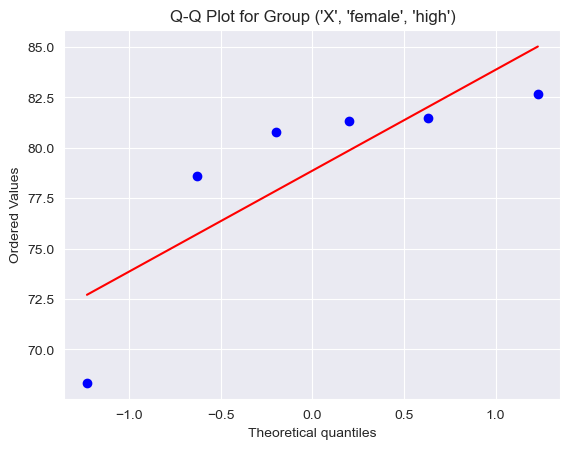

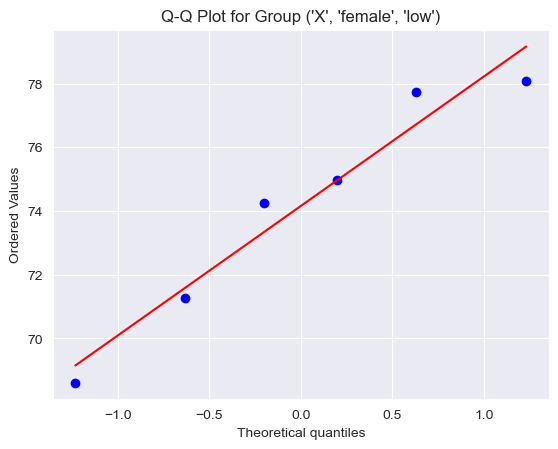

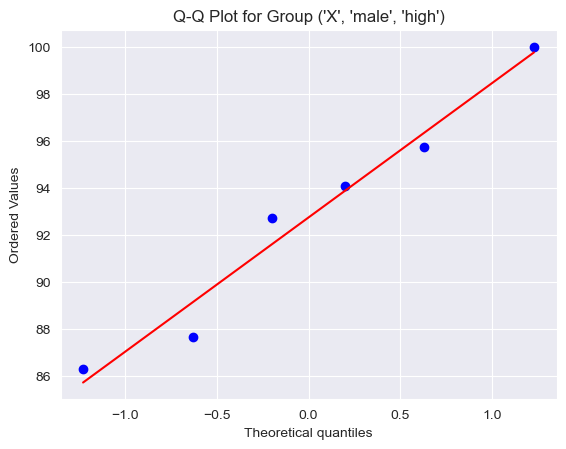

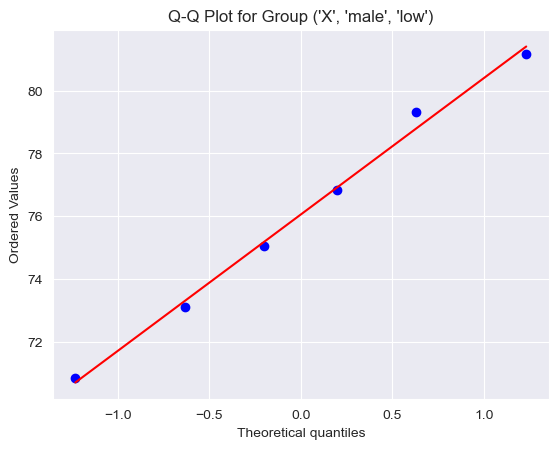

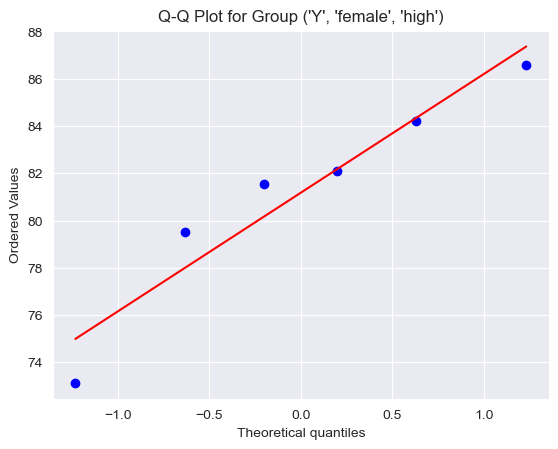

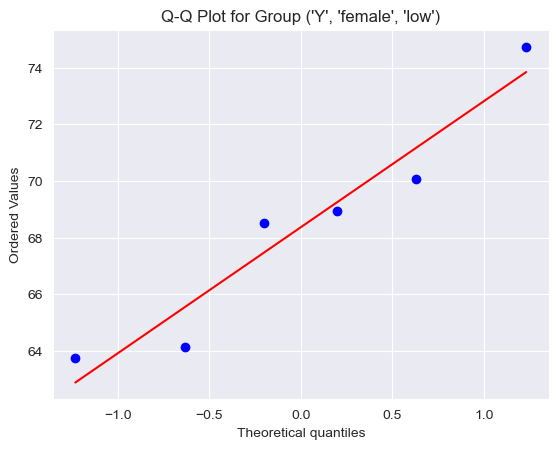

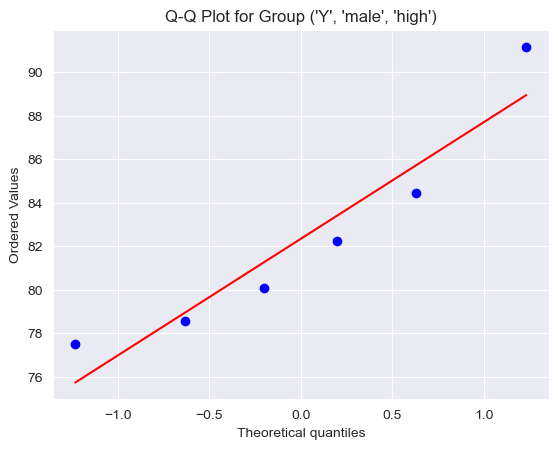

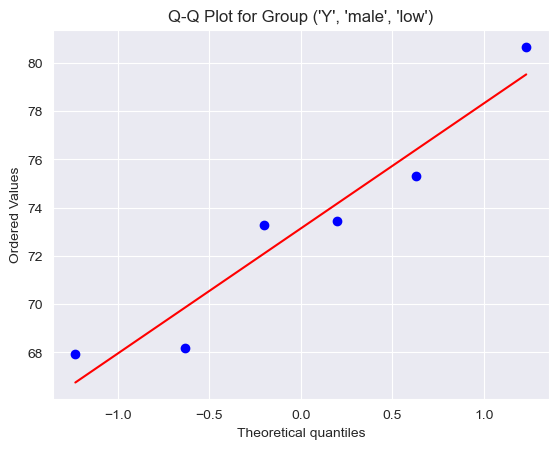

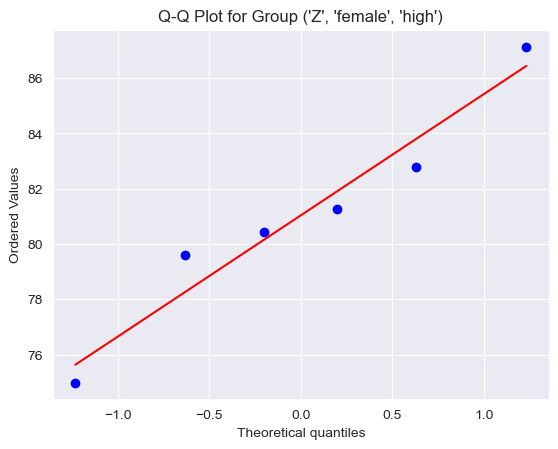

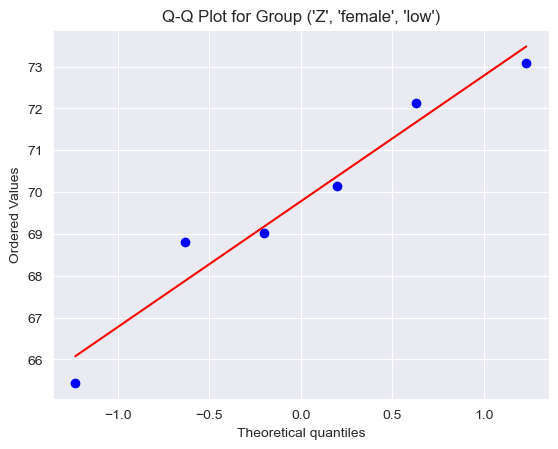

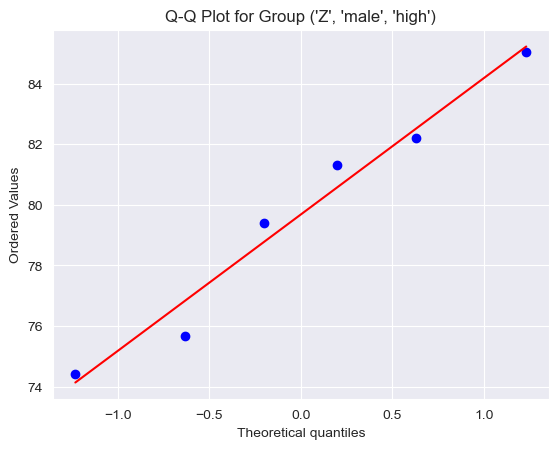

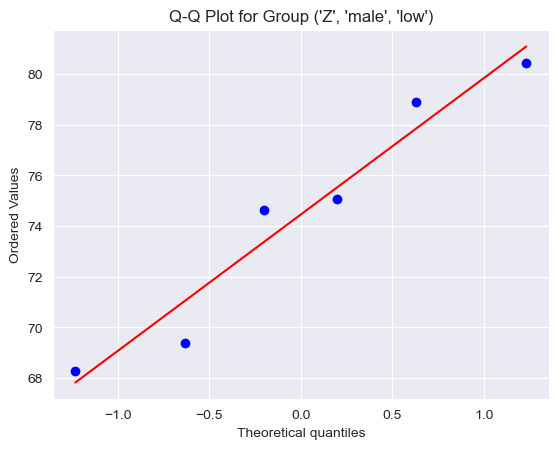

In [12]:
#every p value is bigger than 0.05 value so we can assume that data in groups is normally distributed
# Q-Q plots for each group
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

for name, group in grouped:
    stats.probplot(group['pain_score'], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for Group {name}')
    plt.show()


In [13]:
#test for homogeneity of variance
from scipy.stats import levene

stat, p = levene(headache[headache['treatment'] == 'X']['pain_score'],
                 headache[headache['treatment'] == 'Y']['pain_score'],
                 headache[headache['treatment'] == 'Z']['pain_score'])
print(f'p-value: {p:.4f}')

p-value: 0.4429


GROUPED DATA IS NORMALLY DISTRIBUTED AND HOMOGENEOUS

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('pain_score ~C(treatment) * C(gender) * C(risk)', data=headache).fit()
table = sm.stats.anova_lm(model, typ=2)
print(table)

                                     sum_sq    df          F        PR(>F)
C(treatment)                     283.168031   2.0   7.317679  1.432844e-03
C(gender)                        313.358773   1.0  16.195746  1.625409e-04
C(risk)                         1793.555757   1.0  92.698774  8.799980e-14
C(treatment):C(gender)           129.182324   2.0   3.338353  4.220011e-02
C(treatment):C(risk)              27.595016   2.0   0.713115  4.942214e-01
C(gender):C(risk)                  2.730584   1.0   0.141128  7.084867e-01
C(treatment):C(gender):C(risk)   286.595625   2.0   7.406255  1.334476e-03
Residual                        1160.892871  60.0        NaN           NaN


In [15]:
for p_value in table['PR(>F)']:
    if p_value < 0.05:
        print('Significant interaction effect: p = ', p_value)
    else:
        print('No significant interaction effect: p = ', p_value)

Significant interaction effect: p =  0.001432844427296098
Significant interaction effect: p =  0.00016254092211378832
Significant interaction effect: p =  8.799979642656706e-14
Significant interaction effect: p =  0.04220010993893283
No significant interaction effect: p =  0.49422138135485205
No significant interaction effect: p =  0.7084866640723428
Significant interaction effect: p =  0.0013344758023231867
No significant interaction effect: p =  nan


## colcusions from anova table:
- main effects of variables: treatment, gender and risk are significant
#### These variables independently affect the pain score
- There is a two-way interaction - the effect of treatment on pain_score depends on the gender.
- there is a three-way interaction - combined effect of treatment and gender depends on the risk
- There is no significant two-way interaction between treatment and risk
- There is no significant two-way interaction between gender and risk


In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(headache['pain_score'], headache['treatment'])
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     X      Y  -4.1986 0.1242 -9.2716 0.8744  False
     X      Z  -4.2152 0.1222 -9.2881 0.8578  False
     Y      Z  -0.0166    1.0 -5.0895 5.0564  False
---------------------------------------------------


In [17]:
tukey = pairwise_tukeyhsd(headache['pain_score'], headache['gender'])
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
female   male   4.1724 0.0172 0.7622 7.5826   True
--------------------------------------------------


In [18]:
tukey = pairwise_tukeyhsd(headache['pain_score'], headache['risk'])
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
  high    low  -9.9821   0.0 -12.6196 -7.3446   True
----------------------------------------------------


## Conclusions from Tukey HSD tests:
- There are no significant differences in pain scores between treatments X and Y, X and Z, and Y and Z.
- There is  significant difference in pain score between genders
- there is significant difference in pain score between risk levels

## Final conclusions:
- Treatment type significantly affects pain scores (based on ANOVA) however, differences between specific treatments are not significant (based on Tukey's test)
- Other conclusions are the same as from ANOVA - treatment, risk and gender variables in interaction affect the pain score and so do interacted variables: (treatment, gender).
- There is no significant interaction between treatment and risk 
- There is no significant interaction between gender and risk

<Figure size 800x600 with 0 Axes>

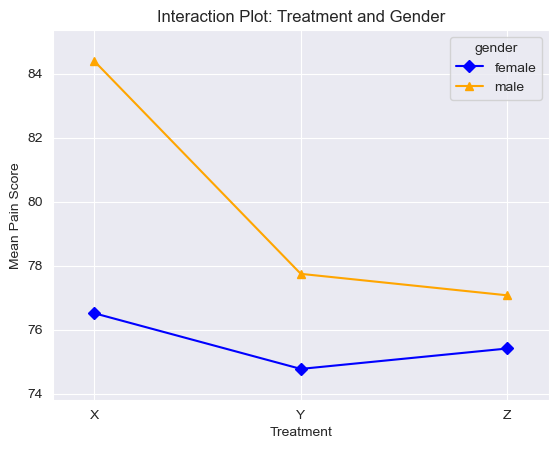

C:\Users\krzys\AppData\Local\Temp\ipykernel_1264\3808403716.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.catplot(data=headache, x='treatment', y='pain_score', hue='risk', col='gender', kind='point',


<Figure size 1000x800 with 0 Axes>

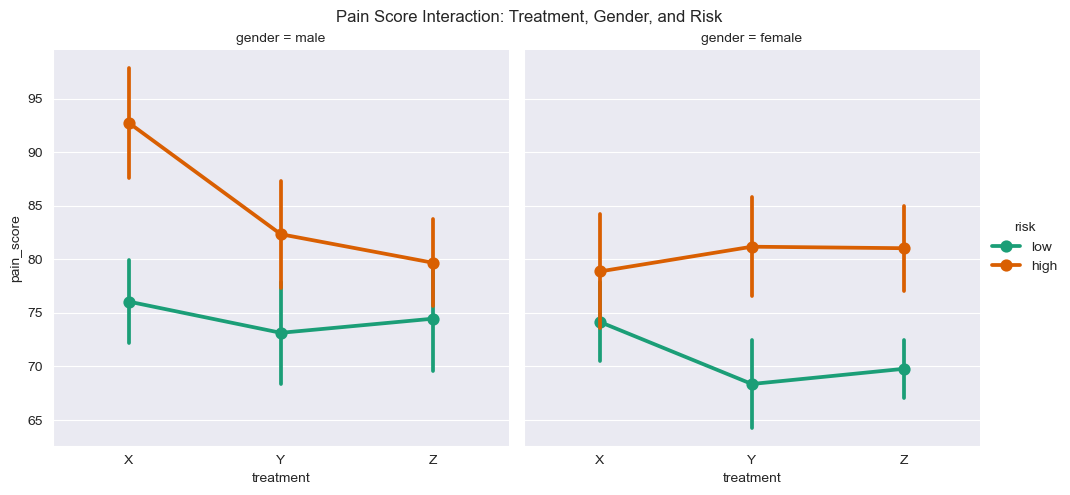

In [19]:
from statsmodels.graphics.factorplots import interaction_plot
plt.figure(figsize=(8, 6))
interaction_plot(headache['treatment'], headache['gender'], headache['pain_score'],
                 colors=['blue', 'orange'], markers=['D', '^'])
plt.title('Interaction Plot: Treatment and Gender')
plt.xlabel('Treatment')
plt.ylabel('Mean Pain Score')
plt.show()

# Interaction plot for treatment, gender, and risk
plt.figure(figsize=(10, 8))
sns.catplot(data=headache, x='treatment', y='pain_score', hue='risk', col='gender', kind='point',
            ci='sd', palette='Dark2', height=5, aspect=1)
plt.subplots_adjust(top=0.9)
plt.suptitle('Pain Score Interaction: Treatment, Gender, and Risk')
plt.show()

## Decomposition of significant interactions:   

In [24]:
#treatment x gender:
male_data = headache[headache['gender'] == 'male']
female_data = headache[headache['gender'] == 'female']

model_male = ols('pain_score ~ C(treatment)', data=male_data).fit()
anova_male = sm.stats.anova_lm(model_male, typ=2)
model_female = ols('pain_score ~ C(treatment)', data=female_data).fit()
anova_female=sm.stats.anova_lm(model_female, typ=2)

print("ANOVA on male's data:")
print(anova_male)

print("ANOVA for female")
print(anova_female)

tukey_male = pairwise_tukeyhsd(male_data['pain_score'], male_data['treatment'])
print("tukey on male's data:")
print(tukey_male)

tukey_female = pairwise_tukeyhsd(female_data['pain_score'], female_data['treatment'])
print("tukey on female's data:")
print(tukey_female)

ANOVA on male's data:
                   sum_sq    df         F    PR(>F)
C(treatment)   393.710706   2.0  3.576346  0.039281
Residual      1816.442447  33.0       NaN       NaN
ANOVA for female
                   sum_sq    df         F    PR(>F)
C(treatment)    18.639649   2.0  0.211388  0.810547
Residual      1454.927406  33.0       NaN       NaN
tukey on male's data:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     X      Y  -6.6552 0.0865 -14.0873  0.777  False
     X      Z   -7.327  0.054 -14.7592 0.1052  False
     Y      Z  -0.6719 0.9733   -8.104 6.7603  False
----------------------------------------------------
tukey on female's data:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     X      Y   -1.742 0.7978 -8.3936 4.9096  False
     X      Z  -1.1033  

## Conclusions from the above analysis:
- ANOVA - Significant effect of treatment on pain score (p = 3,9%) for males
- Tukey test: no significant pairwise differences between treatments for males
- ANOVA - No significant effect of treatment on pain core for females (p = 8,11%)
- Tukey test: no significant pairwise differences between treatments for females

In [27]:
#treatment x risk x gender

low_risk_data = headache[headache['risk'] == 'low']
high_risk_data = headache[headache['risk'] == 'high']
low_male = low_risk_data[low_risk_data['gender'] == 'male']
low_female = low_risk_data[low_risk_data['gender'] == 'female']
high_male = high_risk_data[high_risk_data['gender'] == 'male']
high_female = high_risk_data[high_risk_data['gender'] == 'female']

model_low_male = ols('pain_score ~ C(treatment)', data = low_male).fit()
anova_low_male = sm.stats.anova_lm(model_low_male, typ=2)
model_low_female = ols('pain_score ~ C(treatment)', data = low_female).fit()
anova_low_female = sm.stats.anova_lm(model_low_female, typ=2)
model_high_male = ols('pain_score ~ C(treatment)', data = high_male).fit()
anova_high_male = sm.stats.anova_lm(model_high_male, typ=2)

model_high_female = ols('pain_score ~ C(treatment)', data = high_female).fit()
anova_high_female = sm.stats.anova_lm(model_high_female, typ=2)

print("ANOVA for low risk and males")
print(anova_low_male)

print("ANOVA for low female")
print(anova_low_female)

print("ANOVE for high male")
print(anova_high_male)

print("ANOVA for high female")
print(anova_high_female)


ANOVA for low risk and males
                  sum_sq    df         F    PR(>F)
C(treatment)   25.534637   2.0  0.623132  0.549583
Residual      307.334371  15.0       NaN       NaN
ANOVA for low female
                  sum_sq    df         F    PR(>F)
C(treatment)  109.477870   2.0  4.358657  0.032188
Residual      188.380042  15.0       NaN       NaN
ANOVE for high male
                  sum_sq    df          F    PR(>F)
C(treatment)  571.396212   2.0  12.687808  0.000595
Residual      337.762949  15.0        NaN       NaN
ANOVA for high female
                  sum_sq    df         F    PR(>F)
C(treatment)   20.132278   2.0  0.461164  0.639198
Residual      327.415509  15.0       NaN       NaN


In [29]:
tukey_male_low = pairwise_tukeyhsd(low_male['pain_score'], low_male['treatment'])

print("tukey for male low risk")
print(tukey_male_low)

tukey_male_high = pairwise_tukeyhsd(low_male['pain_score'], low_male['treatment'])

print("tukey for male high risk")
print(tukey_male_high)

tukey_female_low = pairwise_tukeyhsd(low_male['pain_score'], low_male['treatment'])

print("tukey for female low risk")
print(tukey_female_low)

tukey_female_high = pairwise_tukeyhsd(low_male['pain_score'], low_male['treatment'])

print("tukey for female high risk")
print(tukey_female_high)


tukey for male low risk
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     X      Y   -2.913 0.5201 -9.7011 3.8751  False
     X      Z  -1.5959 0.8166  -8.384 5.1922  False
     Y      Z   1.3171 0.8705  -5.471 8.1052  False
---------------------------------------------------
tukey for male high risk
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     X      Y   -2.913 0.5201 -9.7011 3.8751  False
     X      Z  -1.5959 0.8166  -8.384 5.1922  False
     Y      Z   1.3171 0.8705  -5.471 8.1052  False
---------------------------------------------------
tukey for female low risk
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     X      Y   -2.913 0.5201 -9.7011 3.8

## Conclusions from the above analysis:
- RISK = low GENDER = male: 
    - ANOVA: No significant effect of treatment on pain score (p = 55%)
    - Tukey: no significant pairwise differences between treatments
    - Interpretation: No significant effect of treatment on pain score for low-risk males were observed
- RISK = low GENDER = female:
    - ANOVA: significant effect of treatment on pain score (p = 3,2%)
    - Tukey: no significant pairwise differences between treatments
    - Interpretation: Overall effect of treatment is significant for low-risk females, but no significant differences between specific treatments were observed
- RISK = high GENDER = male:
    - ANOVA: significant effect of treatment on pain score (p = 0.06%)
    - Tukey: no significant pairwise differences between treatments
    - Interpretation: Overall effect of treatment is significant for high-risk males, but no significant differences between specific treatments were observed
- RISK = high GENDER = female:
    - ANOVA: No significant effect of treatment on pain score (p = 64%)
    - Tukey: no significant pairwise differences between treatments
    - Interpretation: No significant effect of treatment on pain score for high-risk females were observed
### General conclusions:
- Significant effects were observed for:
    - Males: overall and high-risk but specific pairwise differences between treatments are not significant
    - Females: only low-risk and specific pairwise differences between treatments are not significant
- No significant effects were observed for:
    - For high-risk females and low-risk males, treatment does not affect pain score  

## Summary:
- Overall significant effects from ANOVA do not always translate into significant pairwise differences from tukey test
- Males show stronger effects of treatment (overall and high-risk males got better after treatment) than females (only low-risk got better pain score after treatment)
- Lack of significant differences suggests treatments have similar effects within each group